Importing Libraries

*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib
*   DateTime
*   Wordcloud


In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime
from wordcloud import WordCloud 


In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

Visulaizing the Revenue of all the Movie

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log revenue')

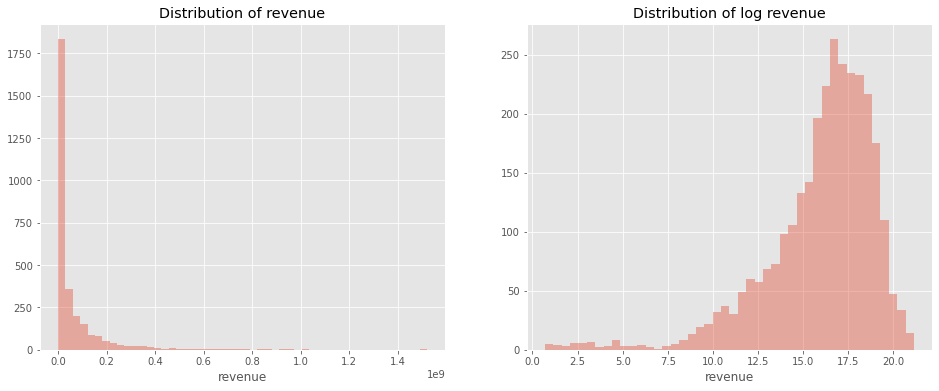

In [4]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1, 2, 1)
#kde=kernel density estimate
sns.distplot(data['revenue'], kde=False);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
#calculate the natural logarithmic value of x+1 where x belongs to all the input array elements.
sns.distplot(np.log1p(data['revenue']), kde=False);
plt.title('Distribution of log revenue')

Visulaizing the Revenue Vs Budget

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


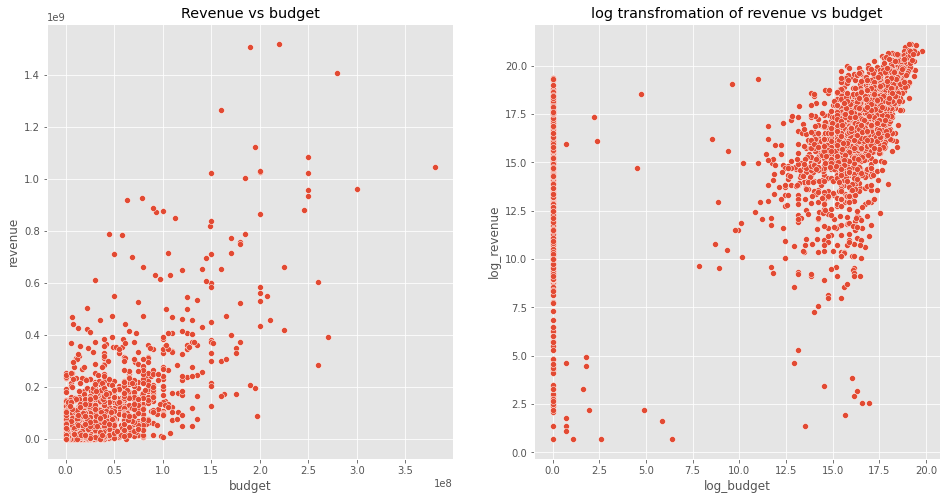

In [5]:
data['log_revenue'] = np.log1p(data['revenue'])
data['log_budget'] = np.log1p(data['budget'])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data['budget'], data['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
sns.scatterplot(data['log_budget'], data['log_revenue']) 
plt.title('log transfromation of revenue vs budget');

Does Having a Homepage for a Movie have an influence on the Revenue

In [6]:
data['homepage'].value_counts()

http://www.transformersmovie.com/                     4
http://www.thehobbit.com/                             2
http://www.lordoftherings.net/                        2
http://www.jodhaaakbar.com/                           1
http://www.sonypictures.com/movies/thegreenhornet/    1
                                                     ..
http://sh-sh.ru/                                      1
http://www.paranoidpark.co.uk/                        1
http://www.mimzy.com                                  1
http://s-wars.jp/                                     1
http://www.stayinyourroom.com/                        1
Name: homepage, Length: 941, dtype: int64

In [7]:
data['has_homepage'] = 0

In [8]:
data.loc[data['homepage'].isnull() == False, 'has_homepage'] = 1

#0 = No Homepage
#1 = HOmepage

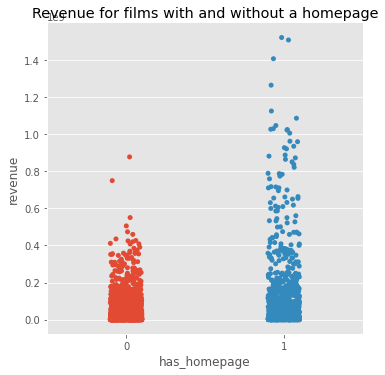

In [9]:
sns.catplot(x='has_homepage', y='revenue', data=data);
plt.title('Revenue for films with and without a homepage'); 

Findings: Only in very few cases we have found that having a website for a particualr movie is influencing the revenue of the movie.

Distribution of the Langauges VS Their Revenues

In [10]:
language_data = data.loc[data['original_language'].isin(data['original_language'].value_counts().head(10).index)]

Text(0.5, 1.0, 'mean of log revenue per language')

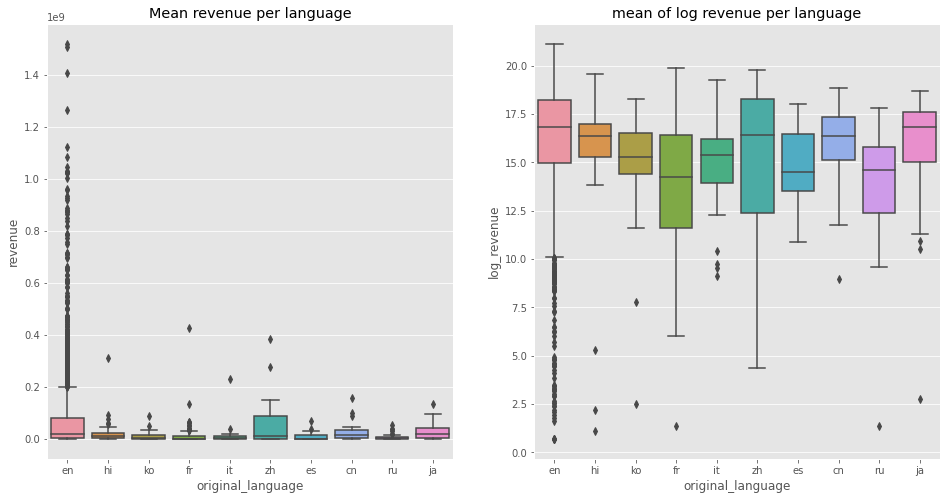

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y = 'revenue', data=language_data )
plt.title('Mean revenue per language')
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y = 'log_revenue', data=language_data)
plt.title('mean of log revenue per language')

Most Frequent Words Used in Movie Titles

In [15]:
text

'When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend. Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her \'princess lessons\'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected... Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity. Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end when everyon

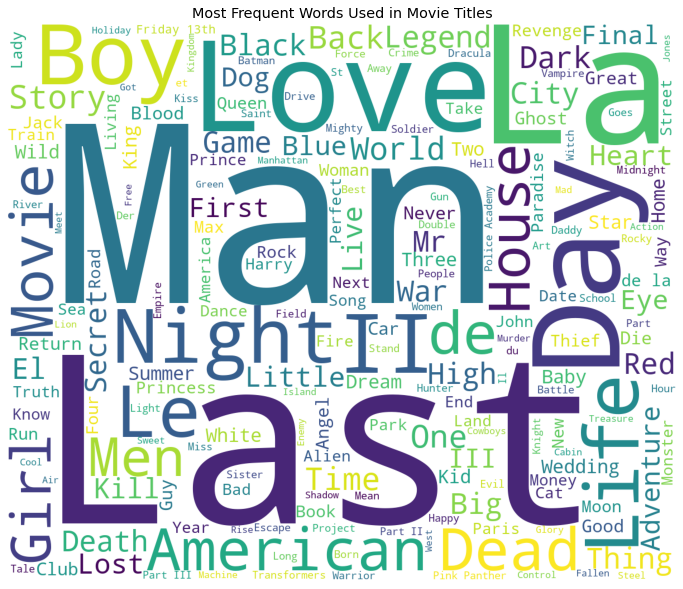

In [12]:
plt.figure(figsize=(12, 12))
text =  ' '.join(data['original_title'].values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Most Frequent Words Used in Movie Titles')
plt.axis('off')
plt.show()

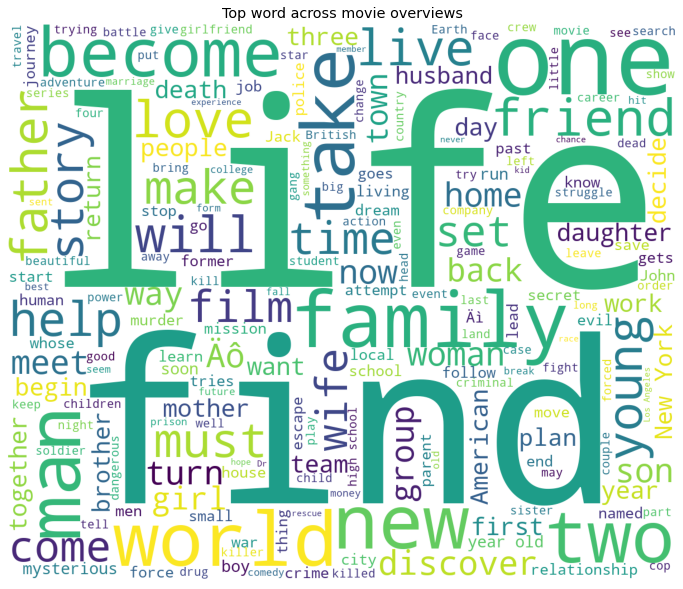

In [13]:
plt.figure(figsize=(12, 12))
text =  ' '.join(data['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top word across movie overviews')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


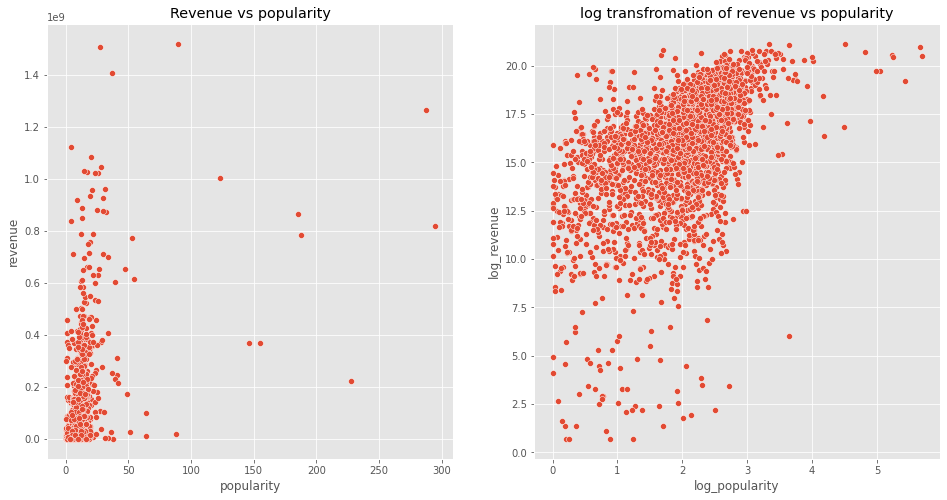

In [14]:

data['log_popularity'] = np.log1p(data['popularity'])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data['popularity'], data['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
sns.scatterplot(data['log_popularity'], data['log_revenue']) 
plt.title('log transfromation of revenue vs popularity');

In [17]:
text1 =  ' '.join(data['all_genres'].fillna('').values)
text1

'Comedy Comedy Drama Family Romance Drama Drama Thriller Action Thriller Adventure Animation Family Horror Thriller Documentary Action Adventure Comedy Family Music Comedy Music Drama Comedy Drama Comedy Crime Action Mystery Science Fiction Thriller Action Crime Drama Horror Thriller Drama Romance Comedy Romance Action Crime Thriller Adventure Family Science Fiction Horror Thriller Horror Thriller Foreign Mystery Thriller Comedy Horror Comedy Horror Mystery Thriller Crime Drama Mystery Thriller Comedy Drama Romance Animation Action Adventure Crime Thriller Comedy Drama Drama Mystery Thriller Action Adventure Fantasy Horror Action Comedy Crime Thriller Action Crime Thriller Comedy Romance Action Drama Science Fiction Thriller Thriller War Western Action Documentary Crime Drama Comedy Drama Comedy Romance Crime Drama Mystery Romance Thriller Adventure Animation Comedy Family Crime Drama Mystery Western Comedy Drama Action Adventure Science Fiction Thriller Comedy Drama Romance Adventure 

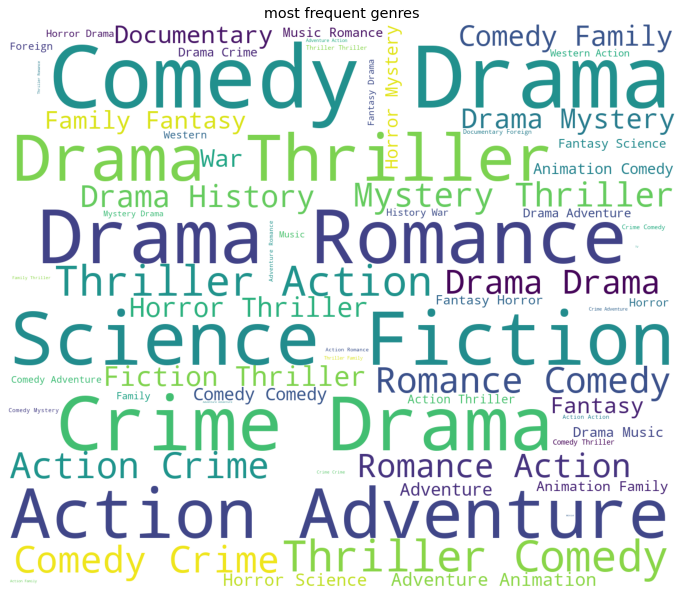

In [20]:
plt.figure(figsize=(12, 12))
wordcloud1 = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1300, height =1100).generate(text1)
plt.imshow(wordcloud1)
plt.title('most frequent genres')
plt.axis('off')
plt.show()

 most frequent genres are
 * Comedy
 * Drama
 * Science Fiction
 * crime